In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ISCEV Control ERG Flinders University.xlsx to ISCEV Control ERG Flinders University.xlsx


In [ ]:
# Replace 'your_file.xlsx' with the name of your uploaded file
df = pd.read_excel("ISCEV Control ERG Flinders University.xlsx")
df.head()  # Display the first few rows of the dataframe

id  Test   age  Ethnic  vert      iris       Eye   a_time    a_amp  \
0     c1   LA3  14.5       2   2.0  1.141572  RightEye  11.3909 -5.23289   
1     c1   LA3  14.5       2   2.0  1.153924   LeftEye  11.3463 -3.98402   
2  c1000  30Hz   5.0       1   2.0  1.116472  RightEye      NaN      NaN   
3  c1000  30Hz   5.0       1   2.0  1.116472  RightEye      NaN      NaN   
4  c1000  30Hz   5.0       1   2.0  1.072432   LeftEye      NaN      NaN   

      b_time    b_amp  sex  OP_s_Amp  OP_s_Time  
0  29.126900  16.7272    0       NaN        NaN  
1  29.985200  18.8737    0       NaN        NaN  
2  26.763275  33.6818    1       NaN        NaN  
3  26.763275  33.6818    1       NaN        NaN  
4  26.763275  29.7059    1       NaN        NaN

In [ ]:
df.isnull().sum()  # Check for missing values

id             0
Test           0
age            0
Ethnic         0
vert         118
iris           0
Eye            0
a_time       217
a_amp        217
b_time         0
b_amp          0
sex            0
OP_s_Amp     576
OP_s_Time    576
dtype: int64

In [ ]:
# Fill missing values for numerical columns with the mean
numerical_columns = ['age', 'vert', 'a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time']
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Optionally, fill missing values for categorical columns with the mode
categorical_columns = ['Test', 'Ethnic', 'Eye', 'sex']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check for remaining missing values
print(df.isnull().sum())

id           0
Test         0
age          0
Ethnic       0
vert         0
iris         0
Eye          0
a_time       0
a_amp        0
b_time       0
b_amp        0
sex          0
OP_s_Amp     0
OP_s_Time    0
dtype: int64


<ipython-input-5-4f46b3e1816f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-5-4f46b3e1816f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
df.head()

id  Test   age  Ethnic  vert      iris       Eye     a_time      a_amp  \
0     c1   LA3  14.5       2   2.0  1.141572  RightEye  11.390900  -5.232890   
1     c1   LA3  14.5       2   2.0  1.153924   LeftEye  11.346300  -3.984020   
2  c1000  30Hz   5.0       1   2.0  1.116472  RightEye  12.203973 -25.070623   
3  c1000  30Hz   5.0       1   2.0  1.116472  RightEye  12.203973 -25.070623   
4  c1000  30Hz   5.0       1   2.0  1.072432   LeftEye  12.203973 -25.070623   

      b_time    b_amp  sex  OP_s_Amp   OP_s_Time  
0  29.126900  16.7272    0  57.17626  147.796311  
1  29.985200  18.8737    0  57.17626  147.796311  
2  26.763275  33.6818    1  57.17626  147.796311  
3  26.763275  33.6818    1  57.17626  147.796311  
4  26.763275  29.7059    1  57.17626  147.796311

In [ ]:
df.isnull().sum()

id           0
Test         0
age          0
Ethnic       0
vert         0
iris         0
Eye          0
a_time       0
a_amp        0
b_time       0
b_amp        0
sex          0
OP_s_Amp     0
OP_s_Time    0
dtype: int64

In [ ]:
# Example condition for creating a target variable (you can modify this condition)
# For demonstration, we'll randomly assign 1 or 0
import numpy as np

# For instance, let's assume we create a random target for illustration
np.random.seed(42)  # For reproducibility
df['suicidal_behaviors'] = np.random.choice([0, 1], size=len(df))

# Check if the target column is created
print(df['suicidal_behaviors'].value_counts())

suicidal_behaviors
1    344
0    322
Name: count, dtype: int64


In [ ]:
# Define features
features = df[['age', 'sex', 'Ethnic', 'a_time', 'a_amp', 'b_time', 'b_amp']]
# Define target
target = df['suicidal_behaviors']

In [ ]:
# Define categorical and numerical features
categorical_features = ['sex', 'Ethnic']
numerical_features = ['age', 'a_time', 'a_amp', 'b_time', 'b_amp']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [ ]:
X = preprocessor.fit_transform(features)
y = target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4636 - loss: 0.7475 - val_accuracy: 0.5421 - val_loss: 0.6968
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5790 - loss: 0.6738 - val_accuracy: 0.4579 - val_loss: 0.7092
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5518 - loss: 0.6659 - val_accuracy: 0.4766 - val_loss: 0.7097
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5493 - loss: 0.6781 - val_accuracy: 0.5140 - val_loss: 0.7143
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5920 - loss: 0.6705 - val_accuracy: 0.5047 - val_loss: 0.7219
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6485 - loss: 0.6544 - val_accuracy: 0.4953 - val_loss: 0.7235
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6368 - loss: 0.6515 - val_accuracy: 0.5047 - val_loss: 0.7243
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5958 - loss: 0.6697 - val_accuracy: 0.4860 - val_loss:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5339 - loss: 0.6917 
Test Accuracy: 0.5000


In [ ]:
# prompt: Write code to Print the evaluation metrics of the Deep Learning Model

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict(X_test))

print(f'Test Accuracy: {test_acc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Accuracy: 0.5000
Precision: 0.4675
Recall: 0.5806
F1-Score: 0.5180
ROC AUC: 0.5440


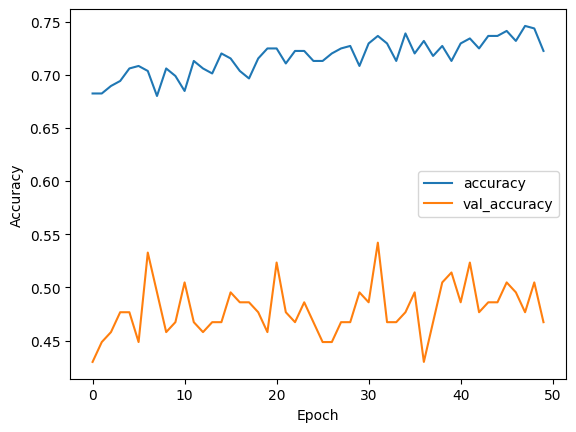

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

suicidal_behaviors
1    344
0    322
Name: count, dtype: int64


<ipython-input-36-271af2ec5279>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette=['blue', 'red'])


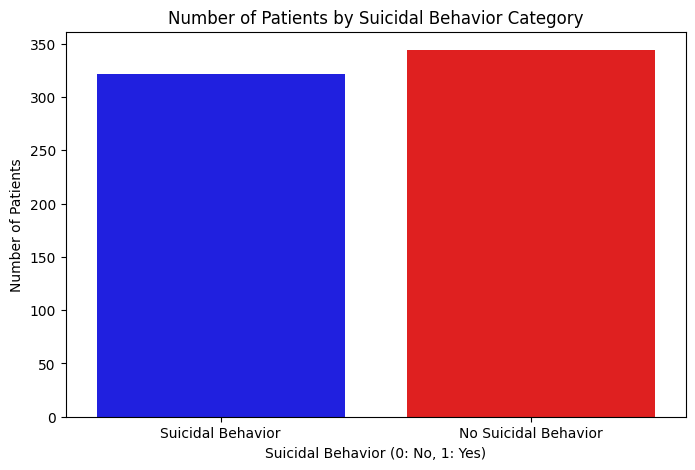

<ipython-input-36-271af2ec5279>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='suicidal_behaviors', y=feature, data=df, palette=['blue', 'red'])
<ipython-input-36-271af2ec5279>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='suicidal_behaviors', y=feature, data=df, palette=['blue', 'red'])
<ipython-input-36-271af2ec5279>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='suicidal_behaviors', y=feature, data=df, palette=['blue', 'red'])
<ipython-input-36-271af2ec5279>:25: FutureWarning: 

Passing `palette` without assigning `hue`

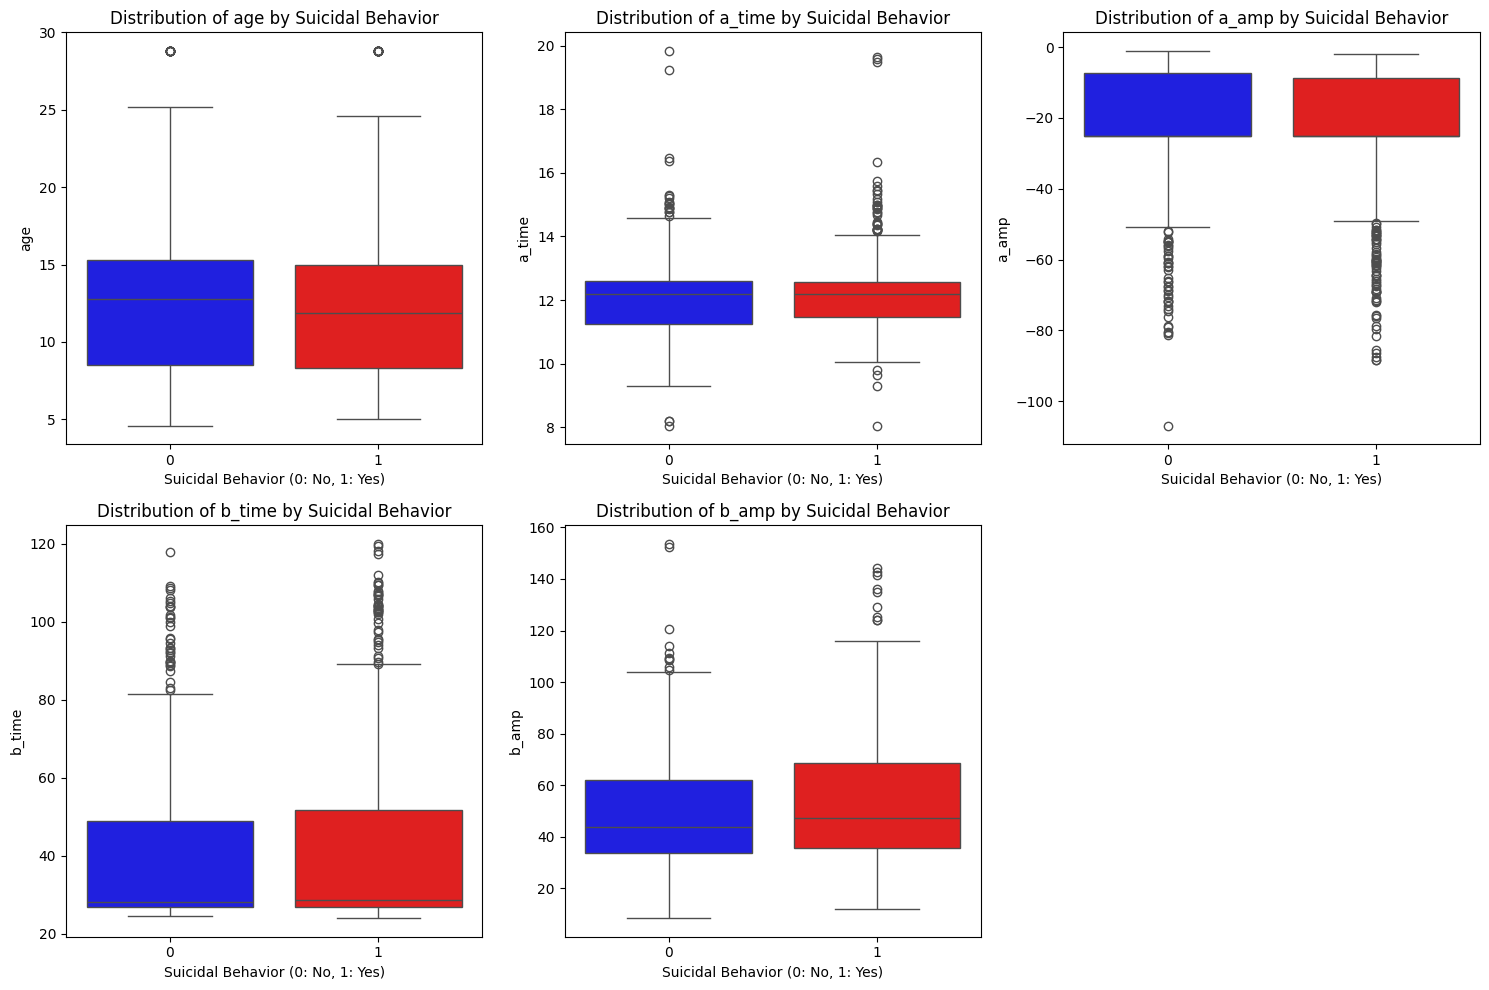

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'suicidal_behaviors' is your target variable
# Count the number of patients in each category
category_counts = df['suicidal_behaviors'].value_counts()
print(category_counts)

# Bar chart for the count of each category
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette=['blue', 'red'])
plt.title('Number of Patients by Suicidal Behavior Category')
plt.xlabel('Suicidal Behavior (0: No, 1: Yes)')
plt.ylabel('Number of Patients')
plt.xticks(ticks=category_counts.index, labels=['No Suicidal Behavior', 'Suicidal Behavior'])
plt.show()

# Box plots for numerical features
numerical_features = ['age', 'a_time', 'a_amp', 'b_time', 'b_amp']  # Adjust based on your dataset

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='suicidal_behaviors', y=feature, data=df, palette=['blue', 'red'])
    plt.title(f'Distribution of {feature} by Suicidal Behavior')
    plt.xlabel('Suicidal Behavior (0: No, 1: Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()